<img src="images/Logo_Tec_azul.png" width="500">

<center>

## Patrones con K-means

### Herramientas computacionales: el arte de la analítica
        
### Oscar E. Delgadillo Ochoa - A01705935

### Pedro Oscar Pérez Murueta
    
### 15/09/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df = pd.read_csv('dataset/Fortnite_players_stats.csv')  # index_col=0
new_df = df[['Solo minutesPlayed', 'Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches', 'Solo kills']]
new_df.describe()

,Solo minutesPlayed,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills
count,1435.000000,1.435000e+03,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,43517.135889,1.088202e+06,328.909408,1.816300,4.853937,6911.060627,11781.843206
std,36314.877771,8.872639e+05,529.192568,1.156026,5.330249,5408.219523,11417.340071
min,210.000000,4.453000e+03,0.000000,0.080000,0.000000,30.000000,28.000000
25%,16922.000000,4.355170e+05,65.500000,1.050000,1.600000,2875.000000,3861.000000
50%,35762.000000,9.070010e+05,162.000000,1.480000,2.900000,5728.000000,8452.000000
75%,59471.000000,1.506555e+06,366.000000,2.200000,6.100000,9585.000000,15993.000000
max,283835.000000,6.772116e+06,6480.000000,9.600000,44.100000,36487.000000,89023.000000


In [ ]:
new_df.loc[:,'Class'] = 0

for i in new_df.index:
    if new_df['Solo minutesPlayed'][i] <= 16922.0:
        new_df['Class'][i] = 0
    elif new_df['Solo minutesPlayed'][i] <= 35762.0 and new_df['Solo minutesPlayed'][i] > 16922.0:
        new_df['Class'][i] = 1
    else:
        new_df['Class'][i] = 2


In [4]:
x = df[['Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches', 'Solo kills']]

X = scale(x)

y = pd.DataFrame(new_df['Class'])
# X[0:10]

In [5]:
clustering = KMeans(n_clusters=3, random_state = 5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [6]:
fort_df = pd.DataFrame(x)
fort_df.columns=['Solo_score', 'Solo_top1', 'Solo_kd', 'Solo_winRatio', 'Solo_matches', 'Solo_kills']
y.columns=['Targets']

Text(0.5, 1.0, 'Clasificación K-Means')

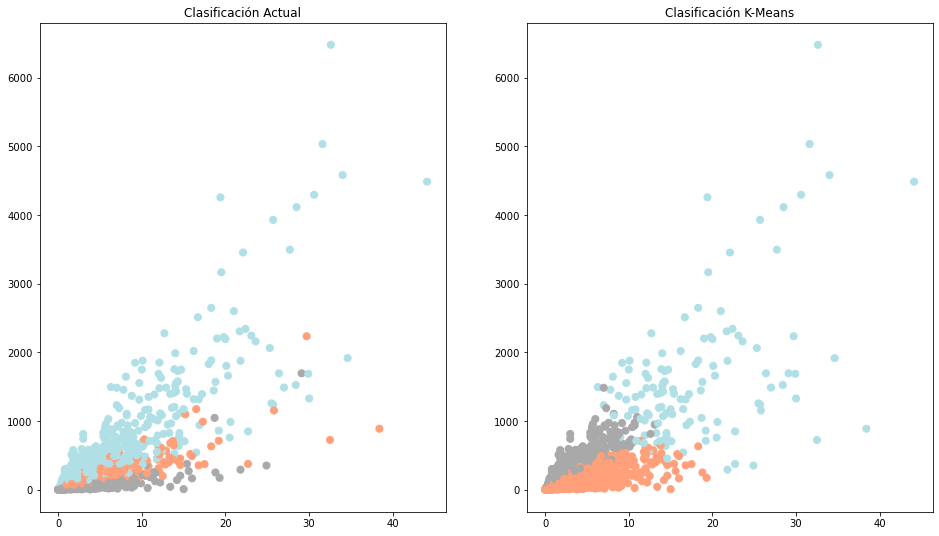

In [12]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])
plt.subplot (1,2,1)
plt.scatter(x = fort_df.Solo_winRatio, y = fort_df.Solo_top1, c = color_theme[y.Targets], s=50)
plt.title ("Clasificación Actual") 

plt.subplot (1,2,2)
plt.scatter(x = fort_df.Solo_winRatio, y = fort_df.Solo_top1, c = color_theme[clustering.labels_], s=50)
plt.title ("Clasificación K-Means") 

Text(0.5, 1.0, 'Clasificación K-Means')

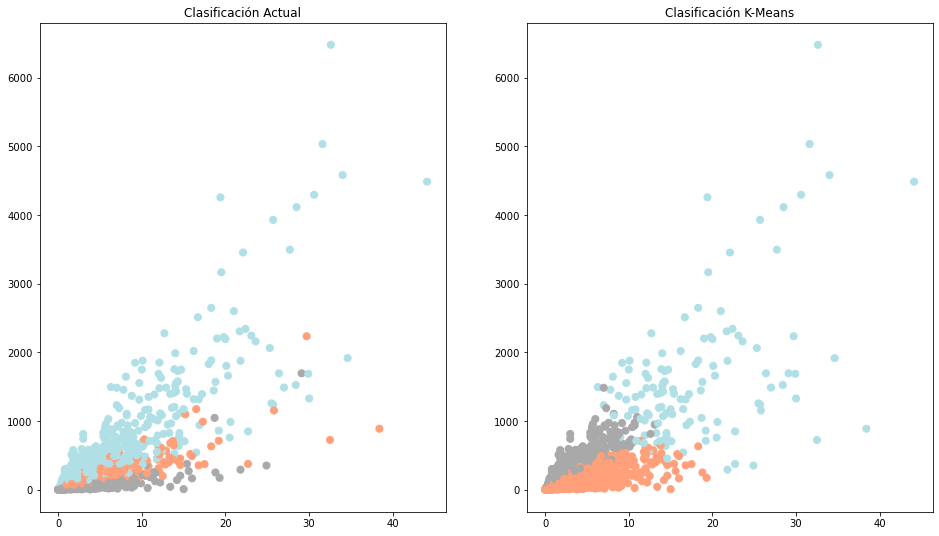

In [14]:
relabel = np.choose (clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot (1,2,1)
plt.scatter(x = fort_df.Solo_winRatio, y = fort_df.Solo_top1, c = color_theme[y.Targets], s=50)
plt.title ("Clasificación Actual") 

plt.subplot (1,2,2)
plt.scatter(x = fort_df.Solo_winRatio, y = fort_df.Solo_top1, c = color_theme[clustering.labels_], s=50)
plt.title ("Clasificación K-Means") 

In [15]:
print (classification_report(y, relabel))

              precision    recall  f1-score   support

           0       0.39      0.99      0.56       359
           1       0.11      0.04      0.05       359
           2       0.98      0.56      0.72       717

    accuracy                           0.54      1435
   macro avg       0.49      0.53      0.44      1435
weighted avg       0.62      0.54      0.51      1435



## Author
> #### Iyad Mohamed Fouad Ali

### Context
I'm a Junior Data Scientist and a Fortnite player, I wanted to make a fun project about fortnite, but I didn't find any dataset on kaggle, so I told my self why don't I make one.

### Content
In this dataset there is 5 game modes (Solo, Duo, Trios. Squads and ltm) each have:
Score: total score.
top1: total wins.
kd : kill/death ratio.
WinRatio: win ratio.
matches: number of matches played.
kills: number of eliminations made.
minutesPlayed: total number of minutes spent.

Data was collected during season 6 chapter 2 (4/2021)

### Acknowledgements
I collected the data using the fortnite tracker API from the tracker network website (https://tracker.gg/).